In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df=pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/notebooks/processedstopword.csv')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['text'] = df['text'].fillna("")
df['title'] = df['title'].fillna("")
df['subject'] = df['subject'].fillna("")

# Aplicar TF-IDF a las columnas 'text' y 'title'
vectorizer = TfidfVectorizer(max_features=5000)  # Se pueden ajustar las características

# Concatenar 'text' y 'title' en un solo corpus para mantener coherencia en el vocabulario
combined_text = df['text'] + " " + df['title']
tfidf_matrix = vectorizer.fit_transform(combined_text)

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [5]:
# Aplicar LabelEncoder a 'subject'
label_encoder = LabelEncoder()
df['subject_encoded'] = label_encoder.fit_transform(df['subject'])

# Agregar la columna codificada al DataFrame TF-IDF
tfidf_df['subject_encoded'] = df['subject_encoded']


In [9]:
X= tfidf_df
y=df['label']

In [10]:


# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4447  201]
 [ 194 4096]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4648
           1       0.95      0.95      0.95      4290

    accuracy                           0.96      8938
   macro avg       0.96      0.96      0.96      8938
weighted avg       0.96      0.96      0.96      8938



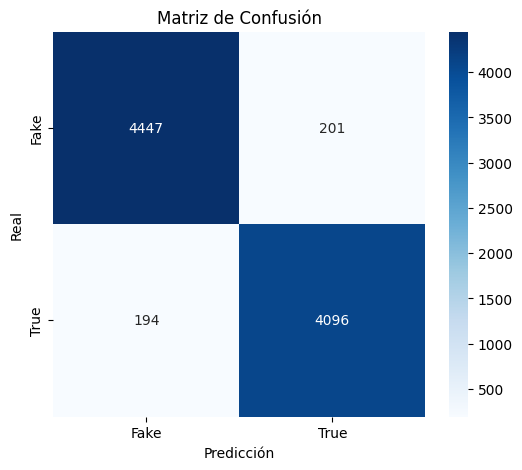

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Definir valores de la matriz de confusión
cm = np.array([[4447, 201],
               [194, 4096]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show();


Verdaderos Positivos (TP): 4447 (clase 0 correctamente predicha)
Falsos Positivos (FP): 201 (clase 1 predicha incorrectamente como 0)
Falsos Negativos (FN): 194 (clase 0 predicha incorrectamente como 1)
Verdaderos Negativos (TN): 4096 (clase 1 correctamente predicha)